In [1]:
pip install tensorflow keras numpy skimage matplotlib


ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Using TensorFlow backend.


In [4]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
# Normalize the pixels
x_train = x_train / 255
x_test = x_test / 255

In [0]:
print(x_train.shape)

(50000, 32, 32, 3)


In [0]:
# Build CNN

model = Sequential()

#First cnn layer
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second cnn layer
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten to 
model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=512, epochs=30, validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 77s 2ms/step - loss: 1.9059 - accuracy: 0.2802 - val_loss: 1.5565 - val_accuracy: 0.4206
Epoch 2/30
40000/40000 [==============================] - 76s 2ms/step - loss: 1.5107 - accuracy: 0.4423 - val_loss: 1.4809 - val_accuracy: 0.4689
Epoch 3/30
40000/40000 [==============================] - 76s 2ms/step - loss: 1.3268 - accuracy: 0.5179 - val_loss: 1.2404 - val_accuracy: 0.5583
Epoch 4/30
34816/40000 [=========================>....] - ETA: 9s - loss: 1.2084 - accuracy: 0.5659 

In [0]:
model.evaluate(x_test, y_test_one_hot)[1]

In [0]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
# new_image = plt.imread("cat.jpg") #Read in the image (3, 14, 20)


In [0]:
new_image = plt.imread("shih-tzu.jpg") #Read in the image (3, 14, 20)

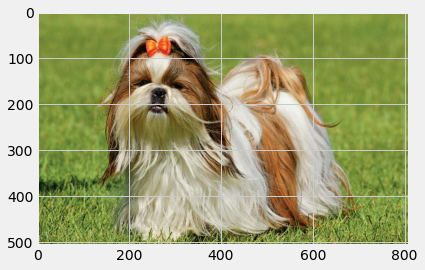

In [0]:
img = plt.imshow(new_image)


In [0]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [0]:
predictions = model.predict(np.array( [resized_image] ))
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

dog : 70.05 %
bird : 28.69 %
cat : 0.95 %
horse : 0.19 %
deer : 0.1 %


In [0]:
model.save('idealna_próba')

In [0]:
model12 = keras.models.load_model('~/pierwsza_próba')

OSError: ignored

In [0]:
model.save("my_model")